In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [9]:
a=pd.read_csv("Bangalore_1990_2022_BangaloreCity.csv")
a

,time,tavg,tmin,tmax,prcp
0,01-01-1990,22.9,19.1,28.4,NaN
1,02-01-1990,21.7,NaN,26.5,0.0
2,03-01-1990,21.0,16.4,26.5,0.0
3,04-01-1990,20.8,NaN,27.4,0.0
4,05-01-1990,20.4,14.2,26.1,0.0
...,...,...,...,...,...
11889,21-07-2022,23.7,20.5,30.8,82.5
11890,22-07-2022,23.2,21.1,27.9,0.0
11891,23-07-2022,23.1,20.9,26.7,0.0
11892,24-07-2022,22.8,20.0,26.7,0.3


In [10]:
a.shape

(11894, 5)

In [11]:
a.describe()

,tavg,tmin,tmax,prcp
count,11824.000000,10505.000000,11265.000000,7274.000000
mean,23.840426,19.385131,29.932827,4.414119
std,2.309899,2.367239,2.957866,12.994655
min,17.200000,9.300000,19.800000,0.000000
25%,22.300000,18.100000,27.900000,0.000000
50%,23.500000,19.800000,29.500000,0.000000
75%,25.200000,20.800000,32.000000,2.000000
max,32.400000,27.900000,39.200000,271.300000


In [12]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11894 entries, 0 to 11893
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    11894 non-null  object 
 1   tavg    11824 non-null  float64
 2   tmin    10505 non-null  float64
 3   tmax    11265 non-null  float64
 4   prcp    7274 non-null   float64
dtypes: float64(4), object(1)
memory usage: 464.7+ KB


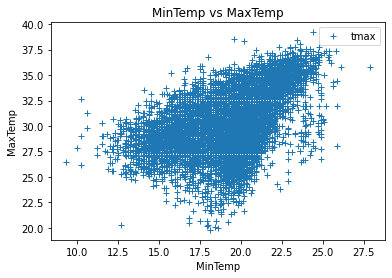

In [17]:
a.plot(x='tmin',y='tmax',style='+')
plt.title('MinTemp vs MaxTemp')  
plt.xlabel('MinTemp')  
plt.ylabel('MaxTemp')  
plt.show()

In [19]:
a['tmin'].values

array([19.1,  nan, 16.4, ..., 20.9, 20. , 20.2])

In [32]:
c=a.dropna()
c.to_csv('weather.csv')

In [33]:
b=pd.read_csv('weather.csv')
b

,Unnamed: 0,time,tavg,tmin,tmax,prcp
0,2,03-01-1990,21.0,16.4,26.5,0.0
1,4,05-01-1990,20.4,14.2,26.1,0.0
2,7,08-01-1990,20.0,16.6,25.1,0.0
3,9,10-01-1990,21.2,15.0,27.7,0.0
4,10,11-01-1990,21.8,16.0,28.5,0.0
...,...,...,...,...,...,...
6078,11889,21-07-2022,23.7,20.5,30.8,82.5
6079,11890,22-07-2022,23.2,21.1,27.9,0.0
6080,11891,23-07-2022,23.1,20.9,26.7,0.0
6081,11892,24-07-2022,22.8,20.0,26.7,0.3


In [34]:
b.drop('Unnamed: 0',axis=1,inplace=True)
b

,time,tavg,tmin,tmax,prcp
0,03-01-1990,21.0,16.4,26.5,0.0
1,05-01-1990,20.4,14.2,26.1,0.0
2,08-01-1990,20.0,16.6,25.1,0.0
3,10-01-1990,21.2,15.0,27.7,0.0
4,11-01-1990,21.8,16.0,28.5,0.0
...,...,...,...,...,...
6078,21-07-2022,23.7,20.5,30.8,82.5
6079,22-07-2022,23.2,21.1,27.9,0.0
6080,23-07-2022,23.1,20.9,26.7,0.0
6081,24-07-2022,22.8,20.0,26.7,0.3


In [35]:
b['tmin'].values

array([16.4, 14.2, 16.6, ..., 20.9, 20. , 20.2])

In [36]:
X = b['tmin'].values.reshape(-1,1)
y = b['tmin'].values.reshape(-1,1)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  

In [38]:
reg = LinearRegression()  
reg.fit(X_train, y_train)

LinearRegression()

In [39]:
print(reg.coef_)

[[1.]]


In [40]:
y_pred = reg.predict(X_test)

In [41]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,20.3,20.3
1,21.2,21.2
2,16.1,16.1
3,18.1,18.1
4,19.6,19.6
...,...,...
1212,18.3,18.3
1213,20.2,20.2
1214,19.5,19.5
1215,20.1,20.1


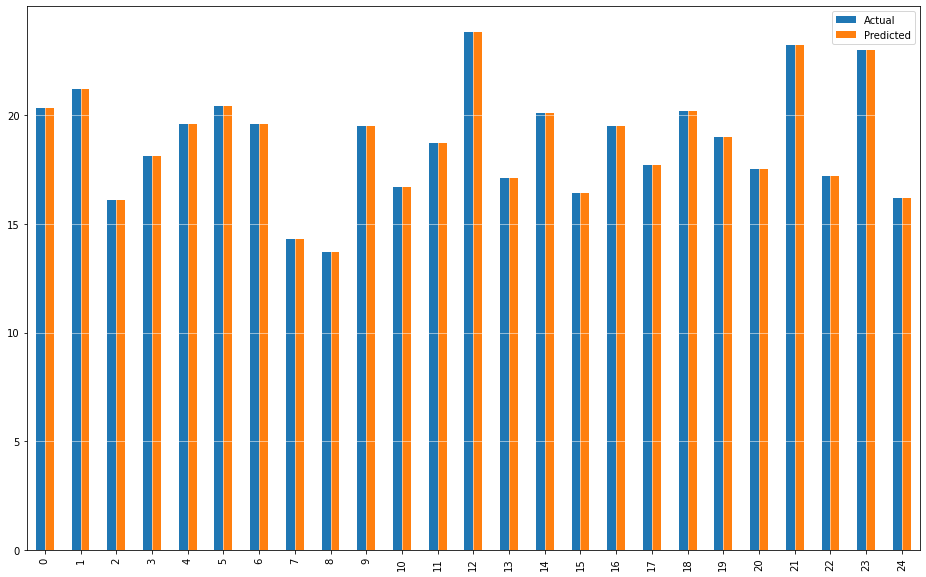

In [45]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='white')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

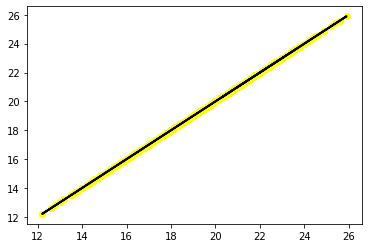

In [48]:
plt.scatter(X_test, y_test,  color='yellow')
plt.plot(X_test, y_pred, color='black', linewidth=2)
plt.show()

In [51]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0


In [52]:
print("Its a perfect model")

Its a perfect model
